In [1]:
from nltk.corpus import stopwords

In [2]:
import sys

In [11]:
os.path.exists(sys.path[-1])

False

In [9]:
sys.path.append(os.path.join(os.environ["HOME"], '/app'))

In [19]:
os.path.exists('/home/ubuntu/app/censor/topic_modeling/app')

False

In [1]:
import artm
import glob
import os
import artm
import glob #module gives an opp to search for a file with a particular regex
import os

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline


In [5]:
def get_batch_vectorizer(target_batches_folder, data_path):
    if not glob.glob(os.path.join(target_batches_folder, "*")):
        return artm.BatchVectorizer(data_path=data_path,
                                                data_format='vowpal_wabbit',
                                                collection_name=data_path + '_collection',
                                                target_folder=target_batches_folder)
    else:
        return artm.BatchVectorizer(data_path=target_batches_folder,
                                                data_format='batches')


In [6]:
def get_dict(target_batches_folder):
    dict_name = os.path.join(target_batches_folder, "dict.txt")
    dictionary = artm.Dictionary(name="dictionary")
    if not os.path.exists(dict_name):
        dictionary.gather(target_batches_folder)
        dictionary.save_text(dict_name)
    else:
        dictionary.load_text(dict_name)
    return dictionary


In [7]:
def print_top_words(model, tracker_name="top_tokens"):
    for topic_name in model.topic_names:
        print(topic_name + ': ')
        if topic_named in last_tokens:
            for word in model.score_tracker[tracker_name].last_tokens[topic_name]:
                print (word)
        else:
            print("free topic")
        print()


In [8]:

def generate_topic_names(topic_count, background_topic_count):

    background_topics, objective_topics, all_topics = [], [], []
    for i in range(topic_count):
        topic_name = ("background_topic_" + str(i)) if i < background_topic_count \
            else ("objective_topic_" + str(i - background_topic_count))
        all_topics.append(topic_name)
        if i < background_topic_count:
            background_topics.append(topic_name)
        else:
            objective_topics.append(topic_name)
    return all_topics, objective_topics, background_topics


In [14]:
def set_regularizers(model, devided, topic_names,  **regs):
    all_topics, objective_topics, background_topics = topic_names
    if devided:
            if 'objective_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_phi']),
                        overwrite= True)
            if 'objective_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_sparse_theta']),
                        overwrite= True)
            if 'background_sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_sparse_phi']),
                        overwrite= True)
            if 'background_sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_sparse_theta']),
                        overwrite=True)
    else:
        if 'sparse_phi' in regs:
                    model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='sparse_phi',
                            tau=regs['sparse_phi']),
                        overwrite=True)
        if 'sparse_theta' in regs:
                    model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='sparse_theta',
                            tau=regs['sparse_theta']),
                        overwrite=True)
    if  'decorrelator_phi' in regs:
            if devided:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                topic_names=objective_topics,
                                tau=regs['decorrelator_phi']),
                            overwrite=True)
            else:
                model.regularizers.add(
                            artm.DecorrelatorPhiRegularizer(
                                name='decorrelator_phi',
                                tau=regs['decorrelator_phi']),
                            overwrite=True)



In [15]:
def set_scores(model, topic_names, devided=True,  **scores):
    #if not ('perplexity_score' in [score.name for
    #                               score in model.scores]):
    #    model.scores.add(PerplexityScore(name='perplexity_score'))
    all_topics, objective_topics ,background_topics = topic_names
    if 'top_tokens' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens',
            num_tokens=scores['top_tokens']),
            overwrite= True)
    if 'top_tokens_extended' in scores:
        model.scores.add(artm.TopTokensScore(
            name='top_tokens_extended',
            num_tokens=scores['top_tokens_extended']),
            overwrite= True)

    if devided:
            if 'objective_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='objective_sparsity_phi',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'objective_sparsity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='objective_sparsity_theta',
                            topic_names=objective_topics),
                        overwrite= True)
            if 'background_sparsity_phi' in scores:
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='background_sparsity_phi',
                            topic_names=background_topics),
                        overwrite= True)
            if 'background_sparsityity_theta' in scores:
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='background_sparsity_theta',
                            topic_names=background_topics),
                        overwrite=True)
    else:
        if 'sparsity_phi' in scores:
                    print ('if sparsity_phi in scores:')
                    model.scores.add(
                        artm.SparsityPhiScore(
                            name='sparsity_phi'),
                        overwrite=True)
        if 'sparsity_theta' in scores:
                    print ('sparsity_theta  in scores')
                    model.scores.add(
                        artm.SparsityThetaScore(
                            name='sparsity_theta'),
                        overwrite=True)



In [16]:

def get_scores(topic_names):
    # background_topics = (background_topics if background_topics else topics_amount//10)

    all_topics, objective_topics, background_topics = topic_names
    print("get_scores", all_topics)
    print("get scores : " , background_topics)
    print ("get_scores : " , objective_topics)

    scores_list=[]
    scores_list.append(artm.PerplexityScore(name='objective_perplexity_score',
                                            topic_names=objective_topics))
    scores_list.append(artm.SparsityPhiScore(name='objective_sparsity_phi',
                                             topic_names=objective_topics))
    scores_list.append(artm.SparsityThetaScore(name='objective_sparsity_theta',
                                               topic_names=objective_topics))

    scores_list.append(artm.PerplexityScore(name='perplexity_score',
                                            topic_names=all_topics))

    scores_list.append(artm.SparsityThetaScore(name='background_sparsity_theta',
                                               topic_names=background_topics))
    scores_list.append(artm.SparsityPhiScore(name='background_sparsity_phi',
                                               topic_names=background_topics))
    scores_list.append(artm.TopTokensScore(name="top_words",
                                              num_tokens=10, topic_names=objective_topics))
    return scores_list



## Get Batch vectorizer

In [17]:
batch_vectorizer = get_batch_vectorizer("contents_batches", "contents_wv.txt")

In [18]:
dictionary=get_dict("contents_batches")

In [137]:
T = 27
topic_names = generate_topic_names(T, 3)
all_topics, objective_topics, background_topics = topic_names

In [138]:
devided_model = artm.ARTM(num_topics=T,
                          topic_names = topic_names[0],
                          cache_theta=True,
                          reuse_theta=True,
                          theta_columns_naming="title",
                          seed=4242,
                          num_document_passes=20,
                          num_processors = 10,
                          class_ids = {"@content" :1, "@title":25, "@category_id" : 200})

devided_model.initialize(dictionary)

In [139]:
_num_tokens =20

##                                                 add some scores

In [140]:
devided_model.scores.add(artm.PerplexityScore(name='perplexity_score'))

### top tokens score

In [454]:
devided_model.scores.add(
    artm.TopTokensScore(
        name='top_tokens',
        num_tokens=_num_tokens, 
        class_id="@content", 
        topic_names=all_topics,
        ),overwrite=True)


### objective_sparsity scores

In [455]:
devided_model.scores.add(
    artm.SparsityPhiScore(
        name='objective_sparsity_phi', 
        topic_names=objective_topics), overwrite=True)
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='objective_sparsity_theta',
        topic_names=objective_topics),overwrite=True)

### background_sparsity scores

In [477]:
devided_model.scores.add(
        artm.SparsityPhiScore(
            name='background_sparsity_phi',
            topic_names=background_topics))
devided_model.scores.add(
    artm.SparsityThetaScore(
        name='background_sparsity_theta',
        topic_names=background_topics),overwrite=True)

AttributeError: Unable to replace existing score.                                  If you really want to do it use overwrite=True argument

## add regulirizers

In [478]:
regs = {
    "objective_smooth_sparse_phi":-10,
    'objective_smooth_sparse_theta':-10,   
    'background_smooth_sparse_phi':1, 
    'background_smooth_sparse_theta':1,
    'decorrelator_phi':30000
}

### add objective regulirizers

In [479]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='objective_sparse_phi',
                            topic_names=objective_topics,
                            tau=regs['objective_smooth_sparse_phi']),overwrite=True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='objective_smooth_sparse_theta',
                            topic_names=objective_topics,
                            tau=regs['objective_smooth_sparse_theta']),overwrite=True)

### add background regulirizers

In [480]:
devided_model.regularizers.addlarizers.add(artm.)

SyntaxError: invalid syntax (<ipython-input-480-2124d21d88a8>, line 1)

In [481]:
devided_model.regularizers.add(
                        artm.SmoothSparsePhiRegularizer(
                            name='background_smooth_sparse_phi',
                            topic_names=background_topics,
                            tau=regs['background_smooth_sparse_phi']),
                            overwrite= True)
devided_model.regularizers.add(
                        artm.SmoothSparseThetaRegularizer(
                            name='background_smooth_sparse_theta',
                            topic_names=background_topics,
                            tau=regs['background_smooth_sparse_theta']),
                            overwrite=True)

### add decorrelator

In [482]:
devided_model.regularizers.add(
            artm.DecorrelatorPhiRegularizer(
                name='decorrelator_phi',
                topic_names=all_topics,
                tau=regs['decorrelator_phi'],class_ids =["@category_id", "@content", "@title"]),overwrite=True)

## reinitialize

In [483]:
devided_model.initialize(dictionary)

### fit offline

In [484]:
devided_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

In [485]:
devided_model.score_tracker['top_tokens'].last_tokens.keys()

dict_keys(['objective_topic_11', 'objective_topic_7', 'objective_topic_10', 'objective_topic_16', 'objective_topic_9', 'objective_topic_3', 'objective_topic_22', 'objective_topic_19', 'objective_topic_4', 'objective_topic_20', 'objective_topic_15', 'objective_topic_21', 'objective_topic_6', 'objective_topic_13', 'objective_topic_14', 'background_topic_1', 'objective_topic_5', 'objective_topic_23', 'objective_topic_18', 'objective_topic_12', 'objective_topic_8', 'objective_topic_1', 'background_topic_2', 'objective_topic_0', 'background_topic_0', 'objective_topic_2', 'objective_topic_17'])

In [486]:
for topic_name in devided_model.topic_names:
    if topic_name in devided_model.score_tracker['top_tokens'].last_tokens:
        print(topic_name + ': '+ ' '.join(devided_model.score_tracker['top_tokens'].last_tokens[topic_name][:10]))

print ("Perplexity:", devided_model.score_tracker["perplexity_score"].last_value)
print (devided_model.get_phi())
print(devided_model.get_theta())
#for i,raw in enumerate(devided_model.get_phi()):
#    print(i,' ',raw)

background_topic_0: имя_муж фамиия_муж имя_жен што идти з решать свет гэт слушать
background_topic_1: имя_муж фамиия_муж имя_жен тема становиться говорить беларусь знать делать работать
background_topic_2: имя_муж фамиия_муж имя_жен тема город делать говорить минск место становиться
objective_topic_0: музыка группа альбом песня играть хороший музыкант слушать новый концерт
objective_topic_1: пауза мама фестиваль индия ехать сцена деревня находить дорога сад
objective_topic_2: татуировка церковь поколение тату петух борода мастер мода зона набивать
objective_topic_3: з имя_жен што фамиия_муж гэт як па пра ад яя
objective_topic_4: биткоин сеть система поллик мотоцикл информация интернет психолог егу услуга
objective_topic_5: ресторан блюдо кухня заведение соус еда повар вкус готовить меню
objective_topic_6: фильм кино город работа структуризация минск музей место снимать белорусский
objective_topic_7: женщина мужчина имя_жен секс девушка фамиия_муж становиться тема говорить сексуальный
o

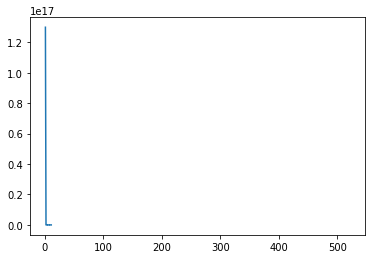

In [487]:
plt.plot(devided_model.score_tracker["perplexity_score"].value[1:])

In [249]:
devided_model

artm.ARTM(num_topics=27, num_tokens=93406, class_ids=['@title', '@content', '@category_id'])

In [65]:
import datetime

In [66]:
datetime.datetime.now().isoformat()

'2018-01-24T20:06:25.424530'

In [58]:
import pickle

In [520]:
import numpy as np

In [ ]:
phi.

In [526]:
import numpy
import copy
import pickle

class Model:
    def __init__(
        self, phi_matrix, theta_matrix, 
        process_number, iterations_via_document,iterations_via_collection, 
        regulirizers, name, background_topic_number=0):
        self.__phi_matrix = phi_matrix
        self.__topic_names = tuple(self.__phi_matrix.index)
        self.__topic_matrix = phi_matrix.transpose()
        self.__theta_matrix = theta_matrix
        
        self.__topic_number = phi_matrix.shape[1]# int
        self.__process_number = process_number #int
        self.__iterations_via_document = iterations_via_document #int
        self.__iterations_via_collection = iterations_via_collection #int
        self.__regulirizers = regulirizers # dict
        self.__name = name #str
        self.__background_topic_number = background_topic_number
        self.__topic_destribution = TopicDestribution()
        
    def get_phi(self):
        return __phi_matrix
    
    def get_topic_namses(self):
        return __topic_names
    
    def get_theta(self):
        return __theta_matrix
    
    def get_topic_number(self):
        return copy.copy(__topic_number)
        
    def get_process_number(self):
        return copt.copy(__process_number)
    
    def get_iterations_via_document(self):
        return copy.copy(__iterations_via_document)
    
    def get_iterations_via_collection(self):
        return copy.copy(__iterations_via_collection)
        
    def get_regulirizers(self):
        return copt.copy(__regulirizers)
    
    def get_name(self):
        return copy.copy(__name)
    
    def get_token_distribution(self, token, modality_num = 0):
        try:
            token_distribution = self.loc[token]
            if len(token_distribution > 1):
                return token_distribution.iloc[0]
            return token_distribution
        except:
            return pd.Series(
                np.zeros(len(column_names)), 
                index=self.__topic_names)
        
    def save(self, file_to_be_saved_in):
        with open(file_to_pickle_in, "wb") as file_to_be_pickled_in:
            pickle.dump(self, file_to_be_pickled_in)

In [ ]:
from scipy.spatial.distance import cosine

class TopicDestribution:
    def __init__(self, _filter, model):
        self.__filter = filter
        self.__model = model
        
    def get_distribution(self, text):
        tokens =  __filter.get_all_tokens(text)
        result_topic_vector = sum(
            self.__model.get_token_distribution(token) for token in tokens)
        return result_topic_vector / sum(result_topic_vector)
    
    def get_similarity(self, distribution_first, distribution_second)
        return cosine(distribution_first, distribution_second)
    
    def get_most_similar_distribution(self, text):
        text_distribution = self.get_distribution(text)
        most_similar_distribution, most_similar_topic_name, similarity_value = (
            self.model.get_topic_matrix().iloc[0], 
            self.model.get_topic_names()[0], np.inf)
        for topic_name in model.get_topic_names():
            if self.get_similarity(
                model.get_topic_matrix.loc[topic_name],
                text_distribution) < similarity_value:
                    most_similar_topic_name = topic_name
                    most_similar_distribution = self.model.get_topic_matrix().loc[topic_name] 
                    similarity_value = self.get_similarity(most_similar_, text_distribution)
        return most_similar_distribution
        

In [489]:
type(phi)

pandas.core.frame.DataFrame

In [519]:
len(phi.loc["родина"])

2

In [527]:
class TopicDestribution:
    def __init__(self, _filter):
        self.filter = __filter
    
    def get_similarity
    
    def get_distribution(self, text):
        tokens =  filter_.get_tokens(text)
        result_topic_vector = sum(
            model.get_token_distribution(token) for token in tokens)
        return result_topic_vector / sum(result_topic_vector)
    
    
    

In [496]:
phi = pickle.load(open("phi.npy", "rb"))

In [562]:
type(phi.loc["фотография"]) == pd.core.frame.DataFrame

True

In [565]:
td = phi.loc["фотография"].iloc[0]


In [578]:
td.idxmax()

'objective_topic_11'

In [522]:
theta = devided_model.get_theta()

In [523]:
theta.shap

,2041,2042,2043,2045,2046,2047,2048,2049,2050,2051,...,991,992,993,994,995,996,997,998,999,1000
background_topic_0,0.361050,0.001803,0.002648,0.001529,0.001451,0.419194,0.400115,0.002012,0.002772,0.531546,...,0.629303,0.002327,0.690457,0.003249,0.003217,0.148624,0.014819,0.003078,0.002966,0.002863
background_topic_1,0.004899,0.002683,0.434285,0.003091,0.541006,0.266491,0.212171,0.994304,0.986888,0.061187,...,0.001480,0.994511,0.001473,0.126862,0.993225,0.010205,0.467975,0.985359,0.950990,0.824885
background_topic_2,0.005728,0.899723,0.005541,0.995380,0.214535,0.004080,0.001229,0.003684,0.010341,0.043283,...,0.001708,0.003161,0.001560,0.527846,0.003558,0.176602,0.056755,0.011563,0.005180,0.002995
objective_topic_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
objective_topic_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
objective_topic_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040864,0.000000
objective_topic_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386485,0.000000,0.000000,0.000000,...,0.367509,0.000000,0.306511,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
objective_topic_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
objective_topic_5,0.000000,0.095791,0.000000,0.000000,0.243008,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
objective_topic_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [528]:
column_names = list(phi.transpose().index)

In [530]:
import pandas as pd

In [532]:
token_distribution = phi.loc["ребёнок"]
if type(token_distribution) == pd.core.frame.DataFrame:
                return token_distribution.iloc[0]
            return token_distribution

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [542]:
df = pd.Series(
    np.zeros(len(column_names)), index=column_names)

In [541]:
type(phi.loc["снеговик"])

pandas.core.series.Series

In [544]:
from scipy.spatial.distance import cosine

In [556]:
cosine(phi.loc["снеговик"],  222 * phi.loc["снеговик"])

0.0

In [549]:
from scipy.spatial.distance import correlation

In [551]:
correlation(phi.loc["снеговик"], -phi.loc["снеговик"])

2.0

In [557]:
devided_model.save("devided_model_made_properly")